In [1]:
from sklearn import svm
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2

In [2]:
paths=['datasets/train_folder/0','datasets/train_folder/1','datasets/test_folder/0','datasets/test_folder/1']
IMG_SIZE = 50

In [3]:
train_paths=[]
train_labels=[]
train_data=[]
test_paths=[]
test_labels=[]
test_data=[]

In [4]:
for _ in os.listdir(paths[0]):
    train_paths.append(paths[0]+'/'+_)
    train_labels.append(0)
for _ in os.listdir(paths[1]):
    train_paths.append(paths[1]+'/'+_)
    train_labels.append(1)

In [5]:
for _ in os.listdir(paths[2]):
    test_paths.append(paths[2]+'/'+_)
    test_labels.append(0)
for _ in os.listdir(paths[3]):
    test_paths.append(paths[3]+'/'+_)
    test_labels.append(1)

In [6]:
for _ in range(len(train_paths)):
    img = cv2.imread(train_paths[_], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    train_data.append(np.array(img))

In [7]:
for _ in test_paths:
    img = cv2.imread(_, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    test_data.append(np.array(img))

In [8]:
train_data=np.array(train_data)
train_labels=np.array(train_labels)
test_data=np.array(test_data)
test_labels=np.array(test_labels)
train_data=train_data/255.0
test_data=test_data/255.0

In [9]:
train_data=train_data.flatten().reshape(-1,IMG_SIZE*IMG_SIZE)
test_data=test_data.flatten().reshape(-1,IMG_SIZE*IMG_SIZE)

In [10]:
model=keras.Sequential([
    keras.Input(shape=(IMG_SIZE*IMG_SIZE)),
    layers.Dense(2500, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [11]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [12]:
model.fit(train_data, train_labels, batch_size=5,epochs=10,verbose=2)

Epoch 1/10


C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


560/560 - 14s - loss: 0.8623 - accuracy: 0.5736 - 14s/epoch - 25ms/step
Epoch 2/10
560/560 - 13s - loss: 0.6477 - accuracy: 0.6279 - 13s/epoch - 23ms/step
Epoch 3/10
560/560 - 13s - loss: 0.6156 - accuracy: 0.6718 - 13s/epoch - 24ms/step
Epoch 4/10
560/560 - 14s - loss: 0.5748 - accuracy: 0.7050 - 14s/epoch - 25ms/step
Epoch 5/10
560/560 - 13s - loss: 0.5421 - accuracy: 0.7214 - 13s/epoch - 23ms/step
Epoch 6/10
560/560 - 12s - loss: 0.5217 - accuracy: 0.7411 - 12s/epoch - 22ms/step
Epoch 7/10
560/560 - 13s - loss: 0.5005 - accuracy: 0.7671 - 13s/epoch - 23ms/step
Epoch 8/10
560/560 - 12s - loss: 0.4935 - accuracy: 0.7636 - 12s/epoch - 22ms/step
Epoch 9/10
560/560 - 12s - loss: 0.4800 - accuracy: 0.7746 - 12s/epoch - 21ms/step
Epoch 10/10
560/560 - 12s - loss: 0.4680 - accuracy: 0.7854 - 12s/epoch - 22ms/step


In [13]:
model.evaluate(test_data, test_labels, batch_size=32,verbose=2)

38/38 - 1s - loss: 0.5277 - accuracy: 0.7458 - 512ms/epoch - 13ms/step


[0.5276961326599121, 0.7458333373069763]

In [14]:
model.predict(test_data[1123].reshape(1,-1))

array([[0.23647393, 0.76352614]], dtype=float32)

In [15]:
model.save('SNN')

INFO:tensorflow:Assets written to: SNN\assets


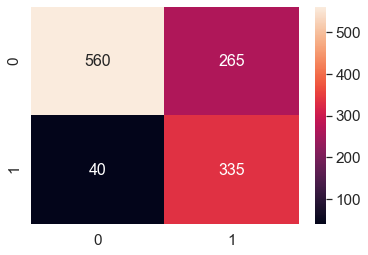

In [16]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
predict=model.predict(test_data)
predict=np.argmax(predict,axis=1)
matrix=confusion_matrix(predict,test_labels)
df_cm = pd.DataFrame(matrix, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g') # font size
plt.show()

In [17]:
#test_mode=tf.keras.models.load_model('model')

In [18]:
#test_mode.predict(test_data[10].reshape(1,-1))